In [1]:
# imported the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten

In [2]:
df = pd.read_csv('C:/Users/eduku/Documents/GitHub/icp-11-vekfd/imdb_master.csv',encoding='latin-1')
print(df.head())
# we have extracted the features and target variables
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


Tokenization

In [3]:
#tokenized the feature data
tokenizer = Tokenizer(num_words=2470)
tokenizer.fit_on_texts(sentences)

Convert list of texts to numpy matrix

In [4]:
sentences = tokenizer.texts_to_matrix(sentences)

In [5]:
len(sentences[0])

2470

In [6]:
# encoding the target columns and splitting the data into test and train data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [7]:
import numpy as np
input_dim=np.prod(X_train.shape[1:])
# printed the diimension of the input record
print(input_dim)

2470


Creating a sequential model

In [8]:
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

Fitting the model

In [9]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 7s 20ms/step - loss: 0.8754 - acc: 0.5058 - val_loss: 0.8387 - val_acc: 0.5171
Epoch 2/5
293/293 [==============================] - 5s 17ms/step - loss: 0.7773 - acc: 0.5890 - val_loss: 0.8350 - val_acc: 0.5214
Epoch 3/5
293/293 [==============================] - 5s 17ms/step - loss: 0.6607 - acc: 0.6965 - val_loss: 0.8674 - val_acc: 0.5163
Epoch 4/5
293/293 [==============================] - 5s 17ms/step - loss: 0.4481 - acc: 0.8420 - val_loss: 0.9647 - val_acc: 0.5146
Epoch 5/5
293/293 [==============================] - 6s 19ms/step - loss: 0.2360 - acc: 0.9460 - val_loss: 1.0953 - val_acc: 0.5047


Plotting the model accuracy graph

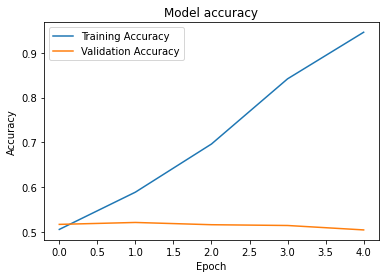

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

In [11]:
nsentences=df['review']
max_review_len=max([len(s.split()) for s in nsentences])
# calculated the number of unique words
vocab_size=len(tokenizer.word_index)+1
#converts each sentence into integer form
nsentences=tokenizer.texts_to_sequences(nsentences)
#Pads sentences to equal length because we need to send the data to model in equal sizes
padded_docs=pad_sequences(nsentences,maxlen=max_review_len)


In [12]:
model1 = Sequential()
model1.add(Embedding(vocab_size,50,input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

fit the model

In [20]:
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 119s 405ms/step - loss: 0.7506 - acc: 0.5977 - val_loss: 0.8610 - val_acc: 0.5104
Epoch 2/5
293/293 [==============================] - 115s 393ms/step - loss: 0.7201 - acc: 0.6220 - val_loss: 0.8747 - val_acc: 0.5084
Epoch 3/5
293/293 [==============================] - 116s 397ms/step - loss: 0.6771 - acc: 0.6537 - val_loss: 0.9368 - val_acc: 0.5131
Epoch 4/5
293/293 [==============================] - 119s 405ms/step - loss: 0.6224 - acc: 0.6878 - val_loss: 1.0275 - val_acc: 0.5082
Epoch 5/5
293/293 [==============================] - 121s 414ms/step - loss: 0.5574 - acc: 0.7289 - val_loss: 1.1943 - val_acc: 0.5019


Model accuracy graph

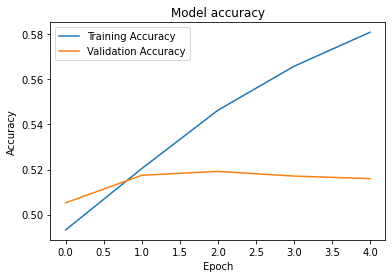

In [19]:
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()